In [1]:
import pandas as pd

*Part 1: Prepare the Data*

In [2]:
# Read myopia.csv into a Pandas DataFrame.
file = 'myopia.csv'
df = pd.read_csv(file)
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [3]:
# Remove the "MYOPIC" column from the dataset.
df = df.drop('MYOPIC', axis=1)
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [4]:
# Standardize your dataset so that columns that contain larger values do not influence the outcome more than columns with smaller values.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)


*Part 2: Apply Dimensionality Reduction*

In [5]:
# Perform dimensionality reduction with PCA. 
from sklearn.decomposition import PCA

pca = PCA()
components = pca.fit_transform(X_scaled)
pcaDf = pd.DataFrame(data = components
             , columns = ['component 1', 'component 2','component 3','component 4','component 5','component 6','component 7','component 8','component 9','component 10','component 11','component 12','component 13','component 14'])

*The number of features reamined the same: 14. This implies all columns are significant*

In [6]:
# Further reduce the dataset dimensions with t-SNE and visually inspect the results. To do this, run t-SNE on the principal components, which is the output of the PCA transformation.
from sklearn.manifold import TSNE
tsne = TSNE(learning_rate=100)
tsne_features = tsne.fit_transform(components)

c:\Users\Renee holliday\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


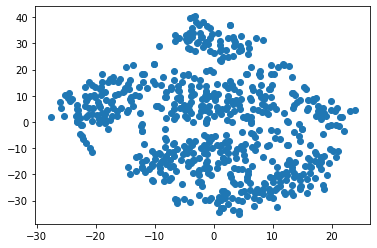

In [7]:
# Create a scatter plot of the t-SNE output. 
import matplotlib.pyplot as plt
df2= df
df2["x"] = tsne_features[:,0]
df2["y"] = tsne_features[:,1]

plt.scatter(df2["x"], df2["y"])
plt.show()

*There seems to be discernable clusters here.*


*Part 3: Perform a Cluster Analysis with K-means*

Create an elbow plot to identify the best number of clusters. Make sure to do the following:

Use a for loop to determine the inertia for each k between 1 through 10.

If possible, determine where the elbow of the plot is, and at which value of k it appears.

In [8]:
from sklearn.cluster import KMeans
inertia = []
# Same as k = list(range(1, 11))
k = [1,2,3,4,5,6,7,8,9,10]

c:\Users\Renee holliday\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


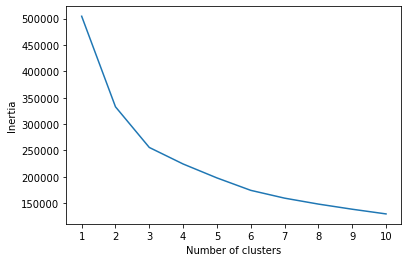

In [9]:
# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df2)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [10]:
def get_clusters(k, data):
    model = KMeans(n_clusters=k, random_state=0)
    model.fit(data)
    predictions = model.predict(data)
    # Create return DataFrame with predicted clusters
    data["MYOPIC"] = model.labels_

    return data

In [11]:
clusters = get_clusters(3, df2)

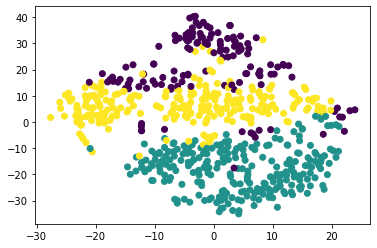

In [12]:
def show_clusters(df):
    plt.scatter(df['x'], df['y'], c=df['MYOPIC'])

    plt.show()

show_clusters(clusters)

In [13]:
labels=set(df2['MYOPIC'])
print(labels)

{0, 1, 2}


*Part 4: Make a Recommendation*

Based on my findings above, I believe that the patients can be clustered into three distinct clusters.
